In [50]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
test = pd.read_csv("test_for_model_add_xy.csv", encoding = "utf-8")
train = pd.read_csv("train_for_model_add_xy.csv", encoding = "utf-8")

In [28]:
test.isnull().sum()

구          0
전용면적(㎡)    0
계약년월       0
층          0
건축년도       0
회사채금리      0
매매가격지수     0
건설공사비지수    0
버스정류장수     0
지하철수       0
연식         0
x좌표        0
y좌표        0
아파트명       0
강남권여부      0
dtype: int64

In [29]:
# 구역 분류(행정계획, 4개년계획)
# 연식별 구분

In [30]:
train.isnull().sum()

구          0
전용면적(㎡)    0
계약년월       0
층          0
건축년도       0
회사채금리      0
매매가격지수     0
건설공사비지수    0
버스정류장수     0
지하철수       0
연식         0
x좌표        0
y좌표        0
아파트명       0
강남권여부      0
target     0
dtype: int64

In [31]:
train['구'].unique()

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

In [33]:
region_map = pd.read_csv("region_map.csv")
region_map.head()

,구,행정계획권역,4개년계획권역
0,강남구,동남권,1권역
1,서초구,동남권,1권역
2,송파구,동남권,1권역
3,강동구,동남권,1권역
4,강서구,서남권,4권역


In [34]:
# merge 하기
train_merge = pd.merge(train, region_map, on="구", how="left")
test_merge = pd.merge(test, region_map, on="구", how="left")

# 확인
print(train_merge.head())
print('='*100)
print(test_merge.head())

# 저장
train_merge.to_csv("train_with_region_devide.csv", index=False, encoding="utf-8")
test_merge.to_csv("test_with_region_devide.csv", index=False, encoding="utf-8")

     구   전용면적(㎡)    계약년월   층  건축년도  회사채금리  매매가격지수  건설공사비지수  버스정류장수  지하철수  연식  \
0  강남구  105.8064  202306  중층  2021  4.356    92.7   127.42    86.0   2.0   2   
1  강남구   74.2500  202301  중층  1983  4.704    94.6   127.10    86.0   2.0  40   
2  강남구   61.1900  202302  중층  1983  4.274    93.6   127.16    86.0   2.0  40   
3  강남구   83.1700  202304  중층  1983  4.072    92.6   127.45    86.0   2.0  40   
4  강남구   83.1700  202304  중층  1983  4.072    92.6   127.45    86.0   2.0  40   

          x좌표        y좌표 아파트명  강남권여부  target 행정계획권역 4개년계획권역  
0  127.057257  37.484829   더샵      1  240000    동남권     1권역  
1  127.068516  37.487597   주공      1  210000    동남권     1권역  
2  127.068516  37.487597   주공      1  199000    동남권     1권역  
3  127.068516  37.487597   주공      1  249000    동남권     1권역  
4  127.068516  37.487597   주공      1  277000    동남권     1권역  
     구   전용면적(㎡)    계약년월   층  건축년도  회사채금리  매매가격지수  건설공사비지수  버스정류장수  지하철수  연식  \
0  강남구   79.9700  202307  저층  1987  4.437    93.0   127.33    86.0 

In [35]:
train2 = pd.read_csv("train_with_region_devide.csv", encoding="utf-8")
test2 = pd.read_csv("test_with_region_devide.csv", encoding="utf-8")

In [36]:
def apt_model_year(연식):
    if 연식 <= 5:
        return "신축"
    elif 5 < 연식 <= 10:
        return "준신축"
    else:
        return "구축"

train2['연식구분'] = train['연식'].apply(apt_model_year)
test2['연식구분'] = test['연식'].apply(apt_model_year)

In [37]:
train2.head()

,구,전용면적(㎡),계약년월,층,건축년도,회사채금리,매매가격지수,건설공사비지수,버스정류장수,지하철수,연식,x좌표,y좌표,아파트명,강남권여부,target,행정계획권역,4개년계획권역,연식구분
0,강남구,105.8064,202306,중층,2021,4.356,92.7,127.42,86.0,2.0,2,127.057257,37.484829,더샵,1,240000,동남권,1권역,신축
1,강남구,74.2500,202301,중층,1983,4.704,94.6,127.10,86.0,2.0,40,127.068516,37.487597,주공,1,210000,동남권,1권역,구축
2,강남구,61.1900,202302,중층,1983,4.274,93.6,127.16,86.0,2.0,40,127.068516,37.487597,주공,1,199000,동남권,1권역,구축
3,강남구,83.1700,202304,중층,1983,4.072,92.6,127.45,86.0,2.0,40,127.068516,37.487597,주공,1,249000,동남권,1권역,구축
4,강남구,83.1700,202304,중층,1983,4.072,92.6,127.45,86.0,2.0,40,127.068516,37.487597,주공,1,277000,동남권,1권역,구축


In [38]:
test2.head()

,구,전용면적(㎡),계약년월,층,건축년도,회사채금리,매매가격지수,건설공사비지수,버스정류장수,지하철수,연식,x좌표,y좌표,아파트명,강남권여부,행정계획권역,4개년계획권역,연식구분
0,강남구,79.9700,202307,저층,1987,4.437,93.0,127.33,86.0,2.0,36,127.056859,37.476276,일반,1,동남권,1권역,구축
1,강남구,108.2017,202308,중층,2021,4.500,93.4,127.39,86.0,2.0,2,127.057257,37.484829,더샵,1,동남권,1권역,신축
2,강남구,161.0000,202307,중층,1984,4.437,93.0,127.33,86.0,2.0,39,127.056019,37.483975,일반,1,동남권,1권역,구축
3,강남구,133.4600,202308,중층,1984,4.500,93.4,127.39,86.0,2.0,39,127.056019,37.483975,일반,1,동남권,1권역,구축
4,강남구,104.4300,202308,중층,1984,4.500,93.4,127.39,86.0,2.0,39,127.056019,37.483975,일반,1,동남권,1권역,구축


In [39]:
# test2.to_csv("test_for_model_add_guandyear.csv", encoding = "utf-8", index=False)
# train2.to_csv("train_for_model_add_guandyear.csv", encoding = "utf-8", index=False)

In [40]:
# 새 CSV (권역 + 연식 + 거리 등) 불러오기
train3 = pd.read_csv("train_distance.csv", encoding="utf-8")
test3 = pd.read_csv("test_distance.csv", encoding="utf-8")

cols_from_train2 = ["행정계획권역", "4개년계획권역", "연식구분"]
train2_subset = train2[cols_from_train2]
test2_subset = test2[cols_from_train2]

# concat (열 기준)
train_final = pd.concat([train2_subset, train3], axis=1)
test_final = pd.concat([test2_subset, test3], axis=1)

In [41]:
test_final.head()

,행정계획권역,4개년계획권역,연식구분,구,전용면적(㎡),계약년월,층,건축년도,회사채금리,매매가격지수,...,연식,x좌표,y좌표,아파트명,강남권여부,대장_좌표X,대장_좌표Y,대장아파트거리,버스거리,지하철거리
0,동남권,1권역,구축,강남구,79.9700,202307,저층,1987,4.437,93.0,...,36,127.056859,37.476276,일반,1,127.02627,37.530594,6.615218,0.094275,1.187672
1,동남권,1권역,신축,강남구,108.2017,202308,중층,2021,4.500,93.4,...,2,127.057257,37.484829,더샵,1,127.02627,37.530594,5.776445,0.108333,0.264330
2,동남권,1권역,구축,강남구,161.0000,202307,중층,1984,4.437,93.0,...,39,127.056019,37.483975,일반,1,127.02627,37.530594,5.810142,0.098015,0.405035
3,동남권,1권역,구축,강남구,133.4600,202308,중층,1984,4.500,93.4,...,39,127.056019,37.483975,일반,1,127.02627,37.530594,5.810142,0.098015,0.405035
4,동남권,1권역,구축,강남구,104.4300,202308,중층,1984,4.500,93.4,...,39,127.056019,37.483975,일반,1,127.02627,37.530594,5.810142,0.098015,0.405035


In [42]:
test_final = test_final.drop(['대장_좌표X', '대장_좌표Y'], axis = 1)
train_final = train_final.drop(['대장_좌표X', '대장_좌표Y'], axis = 1)

In [43]:
test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9272 entries, 0 to 9271
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   행정계획권역   9272 non-null   object 
 1   4개년계획권역  9272 non-null   object 
 2   연식구분     9272 non-null   object 
 3   구        9272 non-null   object 
 4   전용면적(㎡)  9272 non-null   float64
 5   계약년월     9272 non-null   int64  
 6   층        9272 non-null   object 
 7   건축년도     9272 non-null   int64  
 8   회사채금리    9272 non-null   float64
 9   매매가격지수   9272 non-null   float64
 10  건설공사비지수  9272 non-null   float64
 11  버스정류장수   9272 non-null   float64
 12  지하철수     9272 non-null   float64
 13  연식       9272 non-null   int64  
 14  x좌표      9272 non-null   float64
 15  y좌표      9272 non-null   float64
 16  아파트명     9272 non-null   object 
 17  강남권여부    9272 non-null   int64  
 18  대장아파트거리  9272 non-null   float64
 19  버스거리     9272 non-null   float64
 20  지하철거리    9272 non-null   float64
dtypes: float64(11)

In [59]:
train_final['지하철접근성_5단계'] = np.select(
    [
        train_final['지하철거리'] <= 0.5,             # 5점: 500m 이내
        (train_final['지하철거리'] > 0.5) & (train_final['지하철거리'] <= 1.0),  # 4점: 0.5~1km
        (train_final['지하철거리'] > 1.0) & (train_final['지하철거리'] <= 2.0),  # 3점: 1~2km
        (train_final['지하철거리'] > 2.0) & (train_final['지하철거리'] <= 3.0)   # 2점: 2~3km
    ],
    [5, 4, 3, 2],
    default=1  # 3km 초과
)

# 분포 확인
counts = train_final['지하철접근성_5단계'].value_counts().sort_index()
ratios = counts / len(train_final) * 100

print(" 지하철접근성 5단계 분포 ")
for 단계, cnt in counts.items():
    print(f"{단계}점: {cnt:}개 ({ratios[단계]:.1f}%)")



 지하철접근성 5단계 분포 
1점: 81개 (0.1%)
2점: 976개 (0.6%)
3점: 13094개 (8.4%)
4점: 59138개 (37.9%)
5점: 82685개 (53.0%)


/tmp/ipykernel_522447/4137590015.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="Blues_d")


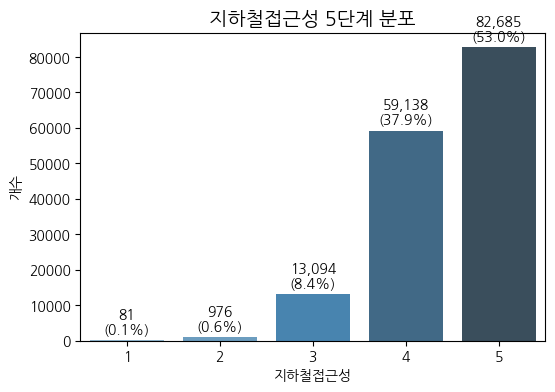

In [63]:
plt.rc('font', family='NanumGothic')
counts = train_final['지하철접근성_5단계'].value_counts().sort_index()
ratios = counts / len(train_final) * 100


plt.figure(figsize=(6,4))
sns.barplot(x=counts.index, y=counts.values, palette="Blues_d")

for i, v in enumerate(counts.values):
    plt.text(i, v + 2000, f"{v:,}\n({ratios.iloc[i]:.1f}%)", ha='center', fontsize=10)

plt.title("지하철접근성 5단계 분포", fontsize=14)
plt.xlabel("지하철접근성")
plt.ylabel("개수")
plt.savefig("지하철접근성 5단계 분포.png")
plt.show()

In [ ]:
import pandas as pd

subway = pd.read_csv("subway_feature.csv")
subway.head()

In [ ]:
# import requests
import pandas as pd

url = "https://maps.apigw.ntruss.com/map-reversegeocode/v2/gc"

raddr = []
for x, y in zip(subway['경도'][:2], subway['위도'][:2]):
    params = {
        "coords": f"{x},{y}",  # 경도, 위도
        "output": "json",
        "orders": "legalcode"
    }

    headers = {
        "x-ncp-apigw-api-key-id": "id",  # Client ID
        "x-ncp-apigw-api-key": "secret"  # Client Secret
    }

    response = requests.get(url, headers=headers, params=params)
    data = response.json()

    # 결과 확인용 출력
    print(data)

In [ ]:
# 지하철 data 시군구 뽑기 성공

# import requests
import pandas as pd
import time
from tqdm import tqdm  

# CSV 불러오기
subway = pd.read_csv('subway_feature.csv')

raddr = []  # 법정동 코드 담을 리스트

url = "https://maps.apigw.ntruss.com/map-reversegeocode/v2/gc"

for x, y in tqdm(zip(subway['경도'], subway['위도'])):
    params = {
        "coords": f"{x},{y}",  # 경도, 위도
        "output": "json",
        "orders": "legalcode"
    }

    headers = {
        "x-ncp-apigw-api-key-id": "client",  # Client ID
        "x-ncp-apigw-api-key": "secret"  # Client Secret
    }

    response = requests.get(url, headers=headers, params=params)
    data = response.json()

      # 지역 정보(area1, area2, area3) 추출
    try:
        area1 = data['results'][0]['region']['area1']['name']  # 시/도
        area2 = data['results'][0]['region']['area2']['name']  # 구
        area3 = data['results'][0]['region']['area3']['name']  # 동
        full_address = f"{area1} {area2} {area3}"
    except (KeyError, IndexError):
        full_address = None

    raddr.append(full_address)
    
    # API 과부하 방지
    time.sleep(0.1)

# 데이터프레임에 컬럼 추가
subway['full_address'] = raddr

# CSV로 저장
subway.to_csv('subway_feature_raddr.csv', index=False, encoding='utf-8-sig')

print("subway_feature_raddr.csv 저장 완료")